         pregnant     glucose   diastolic     triceps     insulin         bmi  \
count  392.000000  392.000000  392.000000  392.000000  392.000000  392.000000   
mean     3.301020  122.627551   70.663265   29.145408  156.056122   33.086224   
std      3.211424   30.860781   12.496092   10.516424  118.841690    7.027659   
min      0.000000   56.000000   24.000000    7.000000   14.000000   18.200000   
25%      1.000000   99.000000   62.000000   21.000000   76.750000   28.400000   
50%      2.000000  119.000000   70.000000   29.000000  125.500000   33.200000   
75%      5.000000  143.000000   78.000000   37.000000  190.000000   37.100000   
max     17.000000  198.000000  110.000000   63.000000  846.000000   67.100000   

         diabetes         age  
count  392.000000  392.000000  
mean     0.523046   30.864796  
std      0.345488   10.200777  
min      0.085000   21.000000  
25%      0.269750   23.000000  
50%      0.449500   27.000000  
75%      0.687000   36.000000  
max      2.420

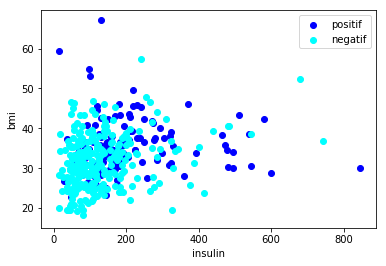

None
KNN accuracy according to K=5 is : 0.7721518987341772


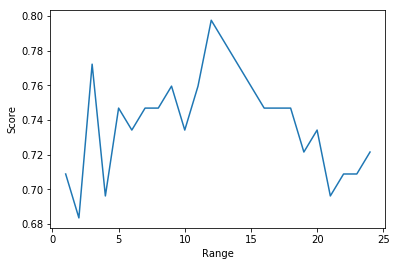

None
KNN accuracy according to K=15 is : 0.759493670886076


In [16]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import dataset
data = pd.read_csv("PimaIndians.csv")

print (data.describe())
print (data.head())
print (data.tail())
print (data.describe())

data.rename(columns={
    'test': 'symptom_class'
}, inplace=True)

positif = data[data.symptom_class == "positif"]
negatif = data[data.symptom_class == "negatif"]
plt.scatter(positif.insulin, positif.bmi, color = "blue",label = "positif")
plt.scatter(negatif.insulin, negatif.bmi, color = "cyan",label = "negatif")
plt.legend()
plt.xlabel("insulin")
plt.ylabel("bmi")
print (plt.show())

data.symptom_class = [1 if each == "positif" else 0 for each in data.symptom_class]

y = data.symptom_class.values
x_ = data.drop(["symptom_class"],axis=1)

x = (x_ - np.min(x_))/(np.max(x_)-np.min(x_)).values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state =42)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(x_train,y_train)
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=5 is :",knn.score(x_test,y_test))

score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
print (plt.show())

knn_final = KNeighborsClassifier(n_neighbors = 15) #set K neighbor as 15
knn_final.fit(x_train,y_train)
predicted_y = knn_final.predict(x_test)
print("KNN accuracy according to K=15 is :",knn_final.score(x_test,y_test))